In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [4]:
import astropy.cosmology as cosmo
from astropy.cosmology import Planck15
import astropy.units as u
import h5py
import plots
from true_params import true_params
import seaborn as sns

sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('colorblind')

## Figure 1

Figure 1 shows the true parameters and also the inferred masses and distances for our data set.

/Users/wfarr/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/wfarr/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


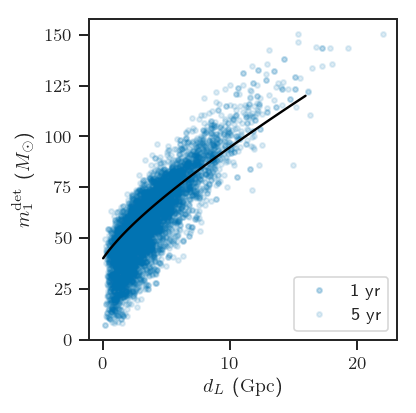

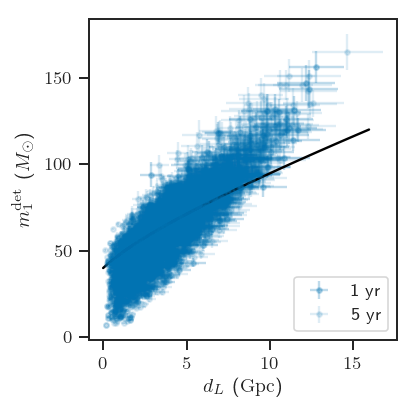

In [6]:
with h5py.File('observations.h5', 'r') as f:
    n1, _ = f.attrs['1yr']
    n1 = int(round(n1))
    m1s = array(f['m1s'])
    zs = array(f['zs'])
    
    m1det = array(f['posteriors/m1det'])
    dl = array(f['posteriors/dl'])
    
with plots.pub_plots(figsize=array(plots.figsize_pub)/2):
    figure()
    d = Planck15.luminosity_distance(zs).to(u.Gpc).value
    plot(d[:n1], m1s[:n1]*(1+zs[:n1]), '.', label='1 yr', color=sns.color_palette()[0], alpha=0.25)
    plot(d[n1:], m1s[n1:]*(1+zs[n1:]), '.', label='5 yr', alpha=0.125, color=sns.color_palette()[0])
    
    z = linspace(0, 2, 100)
    d = Planck15.luminosity_distance(z).to(u.Gpc).value
    
    mmz = true_params['MMax']*(1+z)
    
    plot(d, mmz, color='k')
    
    xlabel(r'$d_L$ ($\mathrm{Gpc}$)')
    ylabel(r'$m_1^\mathrm{det}$ ($M_\odot$)')
    legend(loc='lower right')
    tight_layout()
    savefig('paper/plots/m1-dL-true.pdf')
    
    with h5py.File('paper/plots/m1-dL-true.h5', 'w') as f:
        one = f.create_group('1yr')
        five = f.create_group('5yr')
        
        one.create_dataset('dL', data=d[:n1], compression='gzip', shuffle=True)
        one.create_dataset('m1det', data=m1s[:n1]*(1+zs[:n1]), compression='gzip', shuffle=True)
        
        five.create_dataset('dL', data=d[n1:], compression='gzip', shuffle=True)
        five.create_dataset('m1det', data=m1s[n1:]*(1+zs[n1:]), compression='gzip', shuffle=True)
        
        f.create_dataset('dL', data=d, compression='gzip', shuffle=True)
        f.create_dataset('m1_turnoff', data=mmz, compression='gzip', shuffle=True)
        
    figure()
    
    dm = mean(dl, axis=1)
    ds = std(dl, axis=1)
    mm = mean(m1det, axis=1)
    ms = std(m1det, axis=1)
    
    errorbar(dm[:n1], mm[:n1], xerr=ds[:n1], yerr=ms[:n1], fmt='.', label='1 yr', color=sns.color_palette()[0], alpha=0.25)
    errorbar(dm[n1:], mm[n1:], xerr=ds[n1:], yerr=ms[n1:], fmt='.', label='5 yr', color=sns.color_palette()[0], alpha=0.125)
    
    plot(d, mmz, color='k')
    
    xlabel(r'$d_L$ ($\mathrm{Gpc}$)')
    ylabel(r'$m_1^\mathrm{det}$ ($M_\odot$)')
    legend(loc='lower right')
    tight_layout()
    
    savefig('paper/plots/m1-dL-obs.pdf')
    
    with h5py.File('paper/plots/m1-dL-obs.h5', 'w') as f:
        one = f.create_group('1yr')
        five = f.create_group('5yr')
        
        one.create_dataset('dL', data=dm[:n1], compression='gzip', shuffle=True)
        one.create_dataset('dl_err', data=ds[:n1], compression='gzip', shuffle=True)
        one.create_dataset('m1det', data=mm[:n1], compression='gzip', shuffle=True)
        one.create_dataset('m1det_err', data=ms[:n1], compression='gzip', shuffle=True)
        
        five.create_dataset('dL', data=dm[n1:], compression='gzip', shuffle=True)
        five.create_dataset('dl_err', data=ds[n1:], compression='gzip', shuffle=True)
        five.create_dataset('m1det', data=mm[n1:], compression='gzip', shuffle=True)
        five.create_dataset('m1det_err', data=ms[n1:], compression='gzip', shuffle=True)
        
        f.create_dataset('dL', data=d, compression='gzip', shuffle=True)
        f.create_dataset('m1_turnoff', data=mmz, compression='gzip', shuffle=True)

## Figure 2

Figure 2 shows the constraints we obtain on $H(z)$, with and without external cosmology.

Redshift at which 1-sigma fractional H(z) interval min of 0.05 is 0.63
Redshift at which 1-sigma fractional H(z) interval min of 0.01 is 0.00


/Users/wfarr/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/wfarr/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


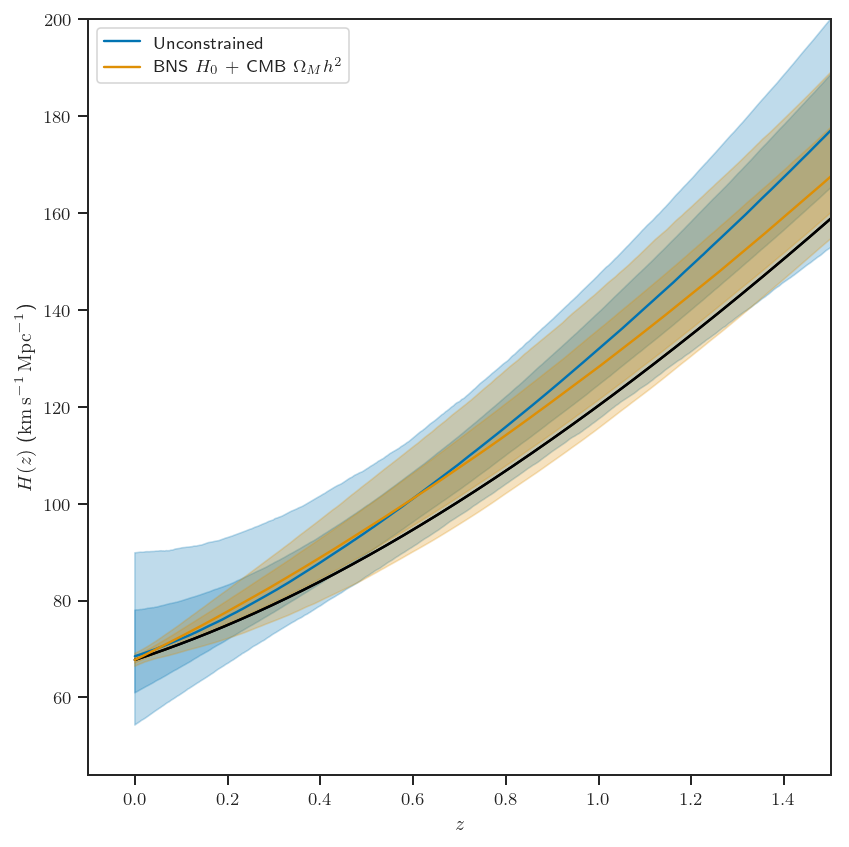

In [9]:
c = plots.load_chains('population_1yr.h5')
cc = plots.load_chains('population_1yr_cosmo.h5')

with plots.pub_plots():
    zs, Hs_un = plots.Hz_plot(c, draw_tracks=False, label='Unconstrained')
    
    _, Hs_con = plots.Hz_plot(cc, color=sns.color_palette()[1], draw_tracks=False, label=r'BNS $H_0$ + CMB $\Omega_M h^2$')
    
    legend(loc='upper left')
    
    axis(xmax=1.5, ymax=200)
    
    tight_layout()
    savefig('paper/plots/Hz.pdf')
    
    with h5py.File('paper/plots/Hz.h5', 'w') as f:
        f.create_dataset('zs', data=zs, compression='gzip', shuffle=True)
        f.create_dataset('Hs-unconstrained', data=Hs_un, compression='gzip', shuffle=True)
        f.create_dataset('Hs-BNS-H0-CMB-Omh2', data=Hs_con, compression='gzip', shuffle=True)